In [51]:
from astropy.table import Table
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import random
import math
from random import randint

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [52]:
t= Table.read('solar_twins_data.fits') #fits file as table 

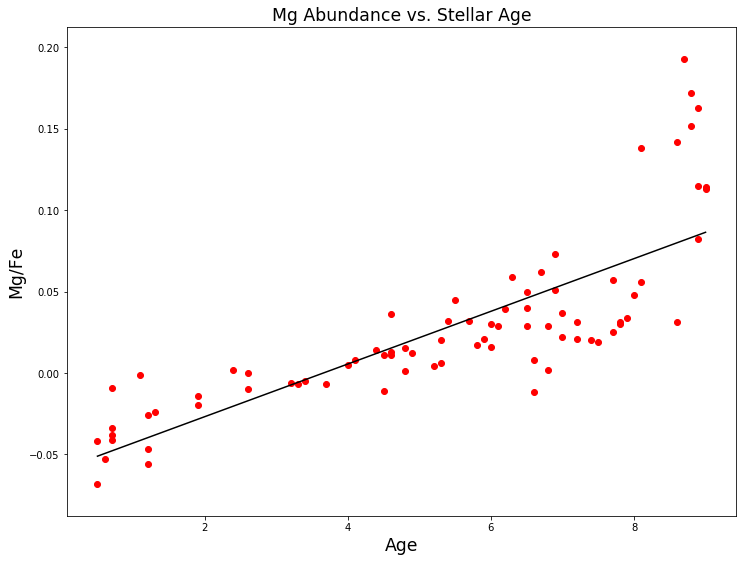

In [53]:
#plot of star age vs Mg abundance from above table
plt.scatter(t['age'], t['Mg'], c='r')  
plt.xlabel('Age',fontsize='xx-large')
plt.ylabel('Mg/Fe', fontsize='xx-large')
plt.title('Mg Abundance vs. Stellar Age', fontsize='xx-large')
plt.plot(np.unique(t['age']), np.poly1d(np.polyfit(t['age'], t['Mg'], 1))(np.unique(t['age'])), color='black')

In [54]:
#importing all data from condensation_temperature
from condensation_temperature import * 

In [55]:
#function that returns temp when given an element
get_tc('O');

In [56]:
#tc_map is a dictionary of elements : condensation temp
#accessing temp from element with tc_map
tc_map['O'];

In [57]:
#creating a table of only one selected star
HIP10175_tbl = t[0] 
HIP10175_tbl;

In [58]:
#accessing only the element columns in the selected star's table and adding them to a list
elements =[]
tablenames = HIP10175_tbl.columns[3:64]
for n in tablenames:
    if len(n) < 3 :
        elements.append(n)
    elements

In [59]:
#list of abundances, in the same order as the elements list
abundance = []
for n in elements:
    abundance.append(HIP10175_tbl[n])
abundance;

In [60]:
#list of condensation temps, in the same order as the elements list
temp = []
for n in elements:
    temp.append(tc_map[n])
temp;

In [61]:
#list of element_err
error_elements = []
for r in tablenames:
    if len(r) > 3 :
        error_elements.append(r)

In [62]:
#list of error values for elements
error = []
for k in error_elements:
    error.append(HIP10175_tbl[k])
error;

In [63]:
#table of element, abundance and temperature
from astropy.table import Table
HIP10175_table = Table([elements, abundance, error, temp], names=('Element', 'Abundance',
        'Abundance Error','Condensation Temp'))

In [64]:
def find_m_b(x,y,err):
    errsq = np.square(err)
    errC = np.diag(errsq)
    ab = ([1] * len(x))
    atemp = x
    mat = []
        
    for z, txt in enumerate(atemp):
        mat.append(atemp[z])
        mat.append(ab[z])
            
    a= np.matrix(mat).reshape((len(x), 2))
    At = np.transpose(a)
    inverrC = np.linalg.inv(errC)
    pt1 = np.dot(At, np.dot(inverrC,a))
    inv1= np.linalg.inv(pt1)
    pt2 = np.dot(At, np.dot(inverrC, y)).T
        
    cov = np.dot(inv1, pt2)
        
    m_= float(cov[0])
    b_= float(cov[1])
    return m_,b_ 

In [65]:
m_b = find_m_b(temp,abundance,error)
print(m_b)

(9.441261972252866e-05, -0.12154306680819207)


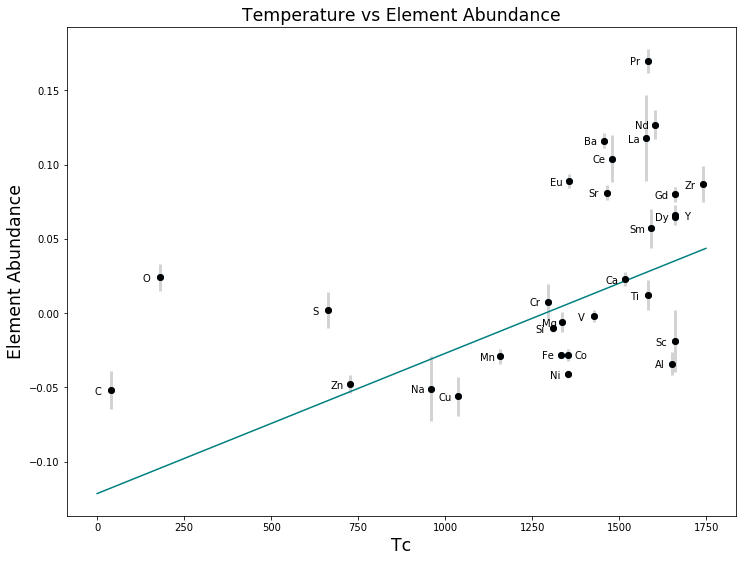

In [66]:
#plotting values for star temp and abundance
plt.scatter(temp, abundance)
plt.xlabel('Tc',fontsize='xx-large', family='sans-serif')
plt.ylabel('Element Abundance', fontsize='xx-large', family='sans-serif')
plt.title('Temperature vs Element Abundance', fontsize= 'xx-large', family='sans-serif')
    
#point labels
for i, txt in enumerate(elements):
    if txt == 'Y' :
        plt.annotate(txt, xy=(temp[i], abundance[i]), xytext=(13,-6), 
           textcoords='offset points', ha='center', va='bottom')
    elif txt == 'Co' :
        plt.annotate(txt, xy=(temp[i], abundance[i]), xytext=(13,-6), 
            textcoords='offset points', ha='center', va='bottom') 
    else : 
        plt.annotate(txt, xy=(temp[i], abundance[i]), xytext=(-13,-6), 
            textcoords='offset points', ha='center', va='bottom')

#error bars
plt.errorbar(temp, abundance, yerr= error, fmt='o', color='black',
                 ecolor='lightgray', elinewidth=3,capsize=0)
m= m_b[0]
b= m_b[1]

temparray=np.array(temp)
plot_xs = np.arange(1750)
plt.plot(plot_xs, m * plot_xs + b, color='teal')

In [67]:
print(m)

9.441261972252866e-05


In [68]:
#function that returns an table with an inputted star's elements, abundance, error and temp
def find_stellar_abundances(star):
    for i, txt in enumerate(t['star_name']):
        if txt == star:
            tbl = t[i] #inputted star's row
            tbl

    star_elements =[]
    elnames = tbl.columns[3:64]
    for n in elnames:
        if len(n) < 3 :
            star_elements.append(n)
            star_elements #list of elements in that star
    
    star_abundance = []
    for n in star_elements:
        star_abundance.append(tbl[n])
        star_abundance #list of element abundances
        
    star_con_temp = []
    for n in star_elements:
        star_con_temp.append(tc_map[n])
        star_con_temp #condensation temperatures for stellar elements
    
    star_error_elements = []
    for r in elnames:
        if len(r) > 3 :
            star_error_elements.append(r)

    el_error = []
    for k in star_error_elements:
        el_error.append(tbl[k])
        el_error #list of error values for elements
    
    star_table = Table([star_elements, star_abundance, el_error, star_con_temp], names=('Element', 'Abundance',
        'Abundance Error','Condensation Temp'))
    return star_table

In [69]:
#function that returns a plot of an inputted star's temperature vs element abundance
def stellar_abundance_plot(star): 
    for i, txt in enumerate(t['star_name']):
        if txt == star:
            tbl = t[i] #inputted star's row
            tbl

    star_elements =[]
    elnames = tbl.columns[3:64]
    for n in elnames:
        if len(n) < 3 :
            star_elements.append(n)
            star_elements #list of elements in that star
    
    star_abundance = []
    for n in star_elements:
        star_abundance.append(tbl[n])
        star_abundance #list of element abundances
        
    star_con_temp = []
    for n in star_elements:
        star_con_temp.append(tc_map[n])
        star_con_temp #condensation temperatures for stellar elements
    new=np.array(star_con_temp)
    
    star_error_elements = []
    for r in elnames:
        if len(r) > 3 :
            star_error_elements.append(r)

    el_error = []
    for k in star_error_elements:
        el_error.append(tbl[k])
        el_error #list of error values for elements
    
    star_table = Table([star_elements, star_abundance, el_error, star_con_temp], names=('Element', 'Abundance',
        'Abundance Error','Condensation Temp'))

    plt.scatter(star_con_temp, star_abundance)
    plt.xlabel('Tc',fontsize='xx-large', family='sans-serif')
    plt.ylabel('Element Abundance', fontsize='xx-large', family='sans-serif')
    plt.title('Temperature vs Element Abundance', fontsize= 'xx-large', family='sans-serif')

    #point labels
    for i, txt in enumerate(elements):
            plt.annotate(txt, xy=(star_con_temp[i], star_abundance[i]), xytext=(-13,-6), 
                textcoords='offset points', ha='center', va='bottom')

    #error bars
    plt.errorbar(star_con_temp, star_abundance, yerr= el_error, fmt='o', color='black',
                 ecolor='lightgray', elinewidth=3,capsize=0)
    
    #line of best fit m,b values
    mb = find_m_b(star_con_temp, star_abundance, el_error)    
    plot_xs = np.arange(1750)
    plt.plot(plot_xs, (mb[0]) * plot_xs + (mb[1]), color='teal')
    return plt

In [70]:
#standard slope error : [A^T C^-1 A]^-1
#inbrackets = np.dot(AT, np.dot(invC,A))
#sserror = np.linalg.inv(inbrackets)
#print(sserror[1,1])

In [71]:
def jackknifemb(_tp,_ab,_er):
    N=1000
    l=list(np.copy(_tp))
    k=list(np.copy(_ab))
    s=list(np.copy(_er))
    jackm= []
    jackb= [] 
    h=0
    
    #leaving out one point from data set and calculating m, b for each instance
    while h<N:
        w = randint(0, 29)
        del l[w]
        del k[w]
        del s[w] #removing one data set from lists 
    
        jk_mb = find_m_b(l,k,s)
        jk_m = jk_mb[0]
        jk_b = jk_mb[1]

        jackm.append(jk_m)
        jackb.append(jk_b)
            
        l=list(np.copy(_tp))
        k=list(np.copy(_ab))
        s=list(np.copy(_er))
        h=h+1 
        
    return jackm, jackb

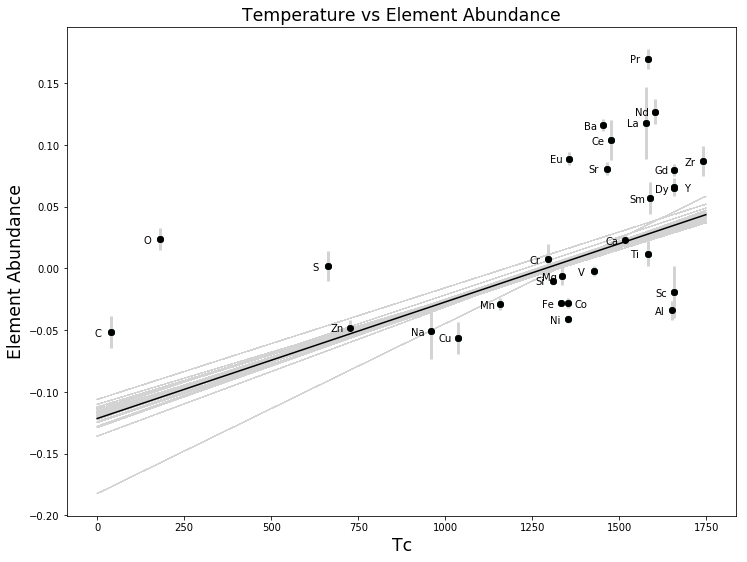

In [79]:
jk= jackknifemb(temp, abundance, error)
for i, txt in enumerate (jk[0]):
    plt.scatter(temp, abundance)
    plt.xlabel('Tc',fontsize='xx-large', family='sans-serif')
    plt.ylabel('Element Abundance', fontsize='xx-large', family='sans-serif')
    plt.title('Temperature vs Element Abundance', fontsize= 'xx-large', family='sans-serif')

    temparray=np.array(temp)
    plot_xs = np.arange(1750)
    plt.plot(plot_xs, jk[0][i] * plot_xs + (jk[1][i]), color = 'lightgray', linewidth=0.5)

for i, txt in enumerate(elements):
    if txt == 'Y' :
        plt.annotate(txt, xy=(temp[i], abundance[i]), xytext=(13,-6), 
            textcoords='offset points', ha='center', va='bottom')
    elif txt == 'Co' :
        plt.annotate(txt, xy=(temp[i], abundance[i]), xytext=(13,-6), 
            textcoords='offset points', ha='center', va='bottom') 
    else : 
        plt.annotate(txt, xy=(temp[i], abundance[i]), xytext=(-13,-6), 
            textcoords='offset points', ha='center', va='bottom')

#error bars
plt.errorbar(temp, abundance, yerr= error, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=3,capsize=0)
plt.plot(plot_xs, m * plot_xs + b, color='black')

In [80]:
jk= jackknifemb(temp, abundance, error)
for i, txt in enumerate (jk[1]):
    if jk[1][i] < -0.15:
        print(jk[1][i], i)

-0.18235968840624145 76
-0.18235968840624145 150
-0.18235968840624145 260
-0.18235968840624145 266
-0.18235968840624145 301
-0.18235968840624145 304
-0.18235968840624145 310
-0.18235968840624145 317
-0.18235968840624145 391
-0.18235968840624145 394
-0.18235968840624145 408
-0.18235968840624145 421
-0.18235968840624145 424
-0.18235968840624145 491
-0.18235968840624145 517
-0.18235968840624145 518
-0.18235968840624145 559
-0.18235968840624145 626
-0.18235968840624145 662
-0.18235968840624145 703
-0.18235968840624145 710
-0.18235968840624145 728
-0.18235968840624145 747
-0.18235968840624145 755
-0.18235968840624145 769
-0.18235968840624145 791
-0.18235968840624145 845
-0.18235968840624145 905
-0.18235968840624145 921
-0.18235968840624145 932
-0.18235968840624145 934


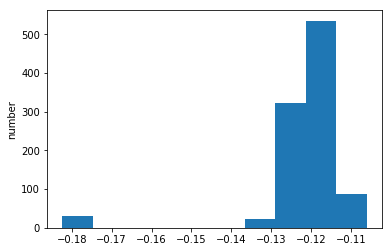

In [85]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = jk[1]
plt.hist(x)
plt.ylabel('number');

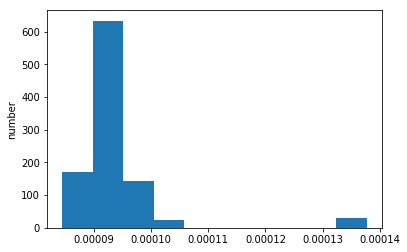

In [86]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = jk[0]
plt.hist(x)
plt.ylabel('number');